In [1]:
import drawsvg as dw
%load_ext jhmagics

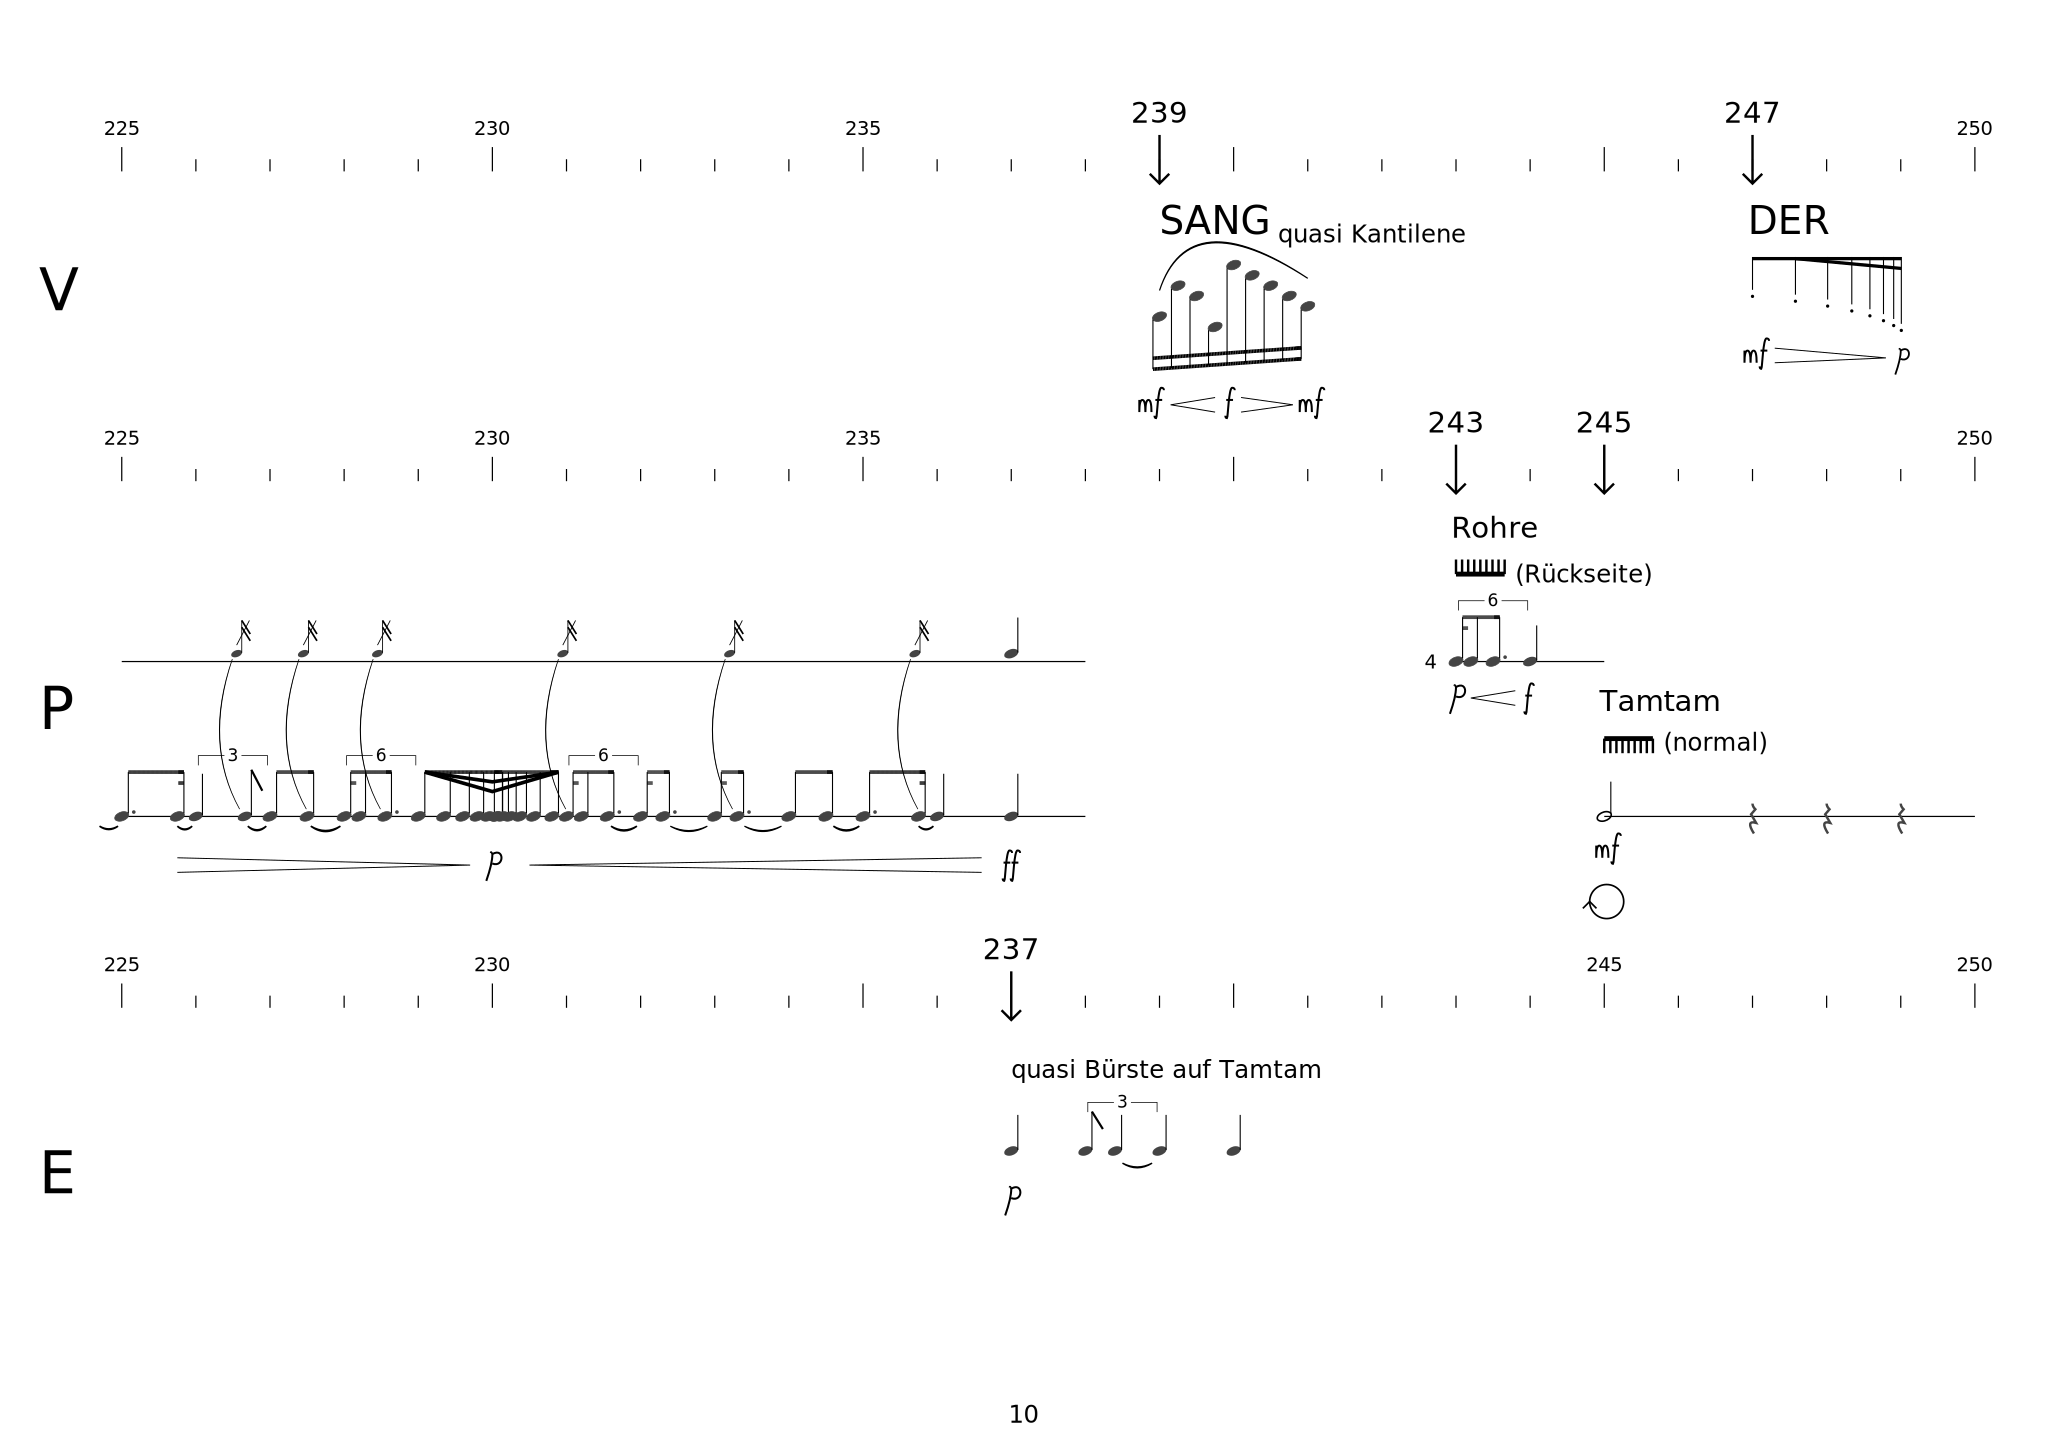

In [128]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 10
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 225  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[225,230,235,250],[225,230,235,250],[225,230,245,250]]
 # events in V P E
event = [[239,247],[243,245],[237]]
 # ygrid positionen für die leisten
yleisten = [1,6,14.5]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.5)
        else: vline(x,y+off,-5,sw=.5)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,8,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # sang
x = xg(239)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('SANG',x,yg(ygindxtext),16)
y = yg(ygindxvtop+2.3)
ylis = [1,4,3,0,6,5,4,3,2]
xylis = []
[xylis.extend([xunit*i/4+x,y-yunit*j/6]) for i,j in zip(range(9),ylis)]
gruppe(xylis,2,dirlen=-1.8,y_space=notsiz)
yy = y-15
tie(x,yy,xg(241),yy-5,-3,.5,thick=.1,cp=.2)
text('quasi Kantilene',xg(240.6),yg(ygindxtext),10,font_family='Cantarell Light',dominant_baseline='middle')
yy = y+35
mezzoforte(x-5,yy,dynsiz)
forte(x+xunit*.9,yy,dynsiz)
mezzoforte(x+xunit*2,yy,dynsiz)
yy -= 3
cresc(xg(239.15),yy,xg(239.75),yy,6)
dim(xg(240.1),yy,xg(240.8),yy,6)

 # der
x = xg(247)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('DER',x-2,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
xlis = x_accelrit(x,xg(249),numnotes=8,ratio=3/4)
accel_stacc(xlis,y,2,nothals,notsiz)
yy = y+28
mezzoforte(xg(247),yy+2,dynsiz)
piano(xg(249),yy+1,dynsiz-1)
dim(xg(247.3),yy-1,xg(248.8),yy,6)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [3.5,6,3.5,6] #abstände der linien von der perc zeitleiste
ylbong,yltom,ylrohr,yltam = [i+ypercindx for i in yloffsets]
ypercinstrs = [ylbong,yltom,ylrohr,yltam]
startends = [225,238,225,238,243,245,245,250] 
insnamen = ['','','Rohre','Tamtam']
yoffsetins = [2.5,2,2,1.7] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==2: text('4',x1-8,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    
 # bongo
y = yg(ylbong)-notsiz/2-1
not16tel(xg(226.55),y,nothals,notsiz-1,alsvorschlag=True)
not16tel(xg(227.45),y,nothals,notsiz-1,alsvorschlag=True)
not16tel(xg(228.45),y,nothals,notsiz-1,alsvorschlag=True)
not16tel(xg(230.95),y,nothals,notsiz-1,alsvorschlag=True)
not16tel(xg(233.2),y,nothals,notsiz-1,alsvorschlag=True)
not16tel(xg(235.7),y,nothals,notsiz-1,alsvorschlag=True)
not4tel(xg(237),y,nothals,notsiz)


 # tomtom
y = yg(yltom)
yy = y+4
ynlet = y-25
gruppe([xg(225),y,xg(225.75),y],[1,2],[1,0],y_space=notsiz)
tie(xg(224.7),yy,xg(224.95),yy,1.5,.7)
tie(xg(225.75),yy,xg(225.95),yy,2,.7)
not4tel(xg(226),y,nothals*1.2,notsiz)
not8tel(xg(226.66),y,nothals*1.2,notsiz)
nlet(xg(226),ynlet,xg(227),ynlet)
tie(xg(226.7),yy,xg(226.95),yy,2,.7)
gruppe([xg(227),y,xg(227.5),y],y_space=notsiz)
tie(xg(227.55),yy,xg(227.95),yy,1.5,.7)
gruppe([xg(228),y,xg(228.2),y,xg(228.55),y],[2,1,1],[0,0,1],y_space=notsiz)
nlet(xg(228),ynlet,xg(229),ynlet,text='6')
xylis = []
[xylis.extend([x,y]) for x in x_accelrit(xg(229),xg(229.95),numnotes=6,ratio=3/4,tolerance=.1)]
x1,ybalk,x2,ybalk = gruppe(xylis,y_space=notsiz,balklen=1.5)
xylis = []
[xylis.extend([x,y]) for x in x_accelrit(xg(230.05),xg(230.8),numnotes=6,ratio=4/3,tolerance=.1)]
x3,ybalk,x4,ybalk = gruppe(xylis,y_space=notsiz,balklen=1.5)
lines(x1,ybalk,xg(230),ybalk+8,x4,ybalk,stroke_width=notsiz/3)
lines(x1,ybalk,xg(230),ybalk+4,x4,ybalk,stroke_width=notsiz/3)
gruppe([xg(231),y,xg(231.2),y,xg(231.55),y],[2,1,1],[0,0,1],y_space=notsiz)
nlet(xg(231),ynlet,xg(232),ynlet,text='6')
tie(xg(231.6),yy,xg(231.95),yy,1.5,.7)
gruppe([xg(232),y,xg(232.3),y],[2,1],[0,1],y_space=notsiz)
tie(xg(232.4),yy,xg(232.9),yy,1.2,.5)
gruppe([xg(233),y,xg(233.3),y],[2,1],[0,1],y_space=notsiz)
tie(xg(233.4),yy,xg(233.9),yy,1.2,.5)
gruppe([xg(234),y,xg(234.5),y],y_space=notsiz)
tie(xg(234.6),yy,xg(234.95),yy,1.5,.7)
gruppe([xg(235),y,xg(235.75),y],[1,2],[1,0],y_space=notsiz)
tie(xg(235.75),yy,xg(235.95),yy,2,.7)
not4tel(xg(236),y,nothals*1.2,notsiz)
not4tel(xg(237),y,nothals*1.2,notsiz)

 #dynamik
yy = y+20
piano(xg(230),yy,dynsiz)
fortissimo(xg(236.95),yy+4,dynsiz)
dim(xg(225.75),yy,xg(229.7),yy,6)
cresc(xg(230.5),yy,xg(236.6),yy,6)

 # bögen
x = xg(226.59)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)
x = xg(227.49)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)
x = xg(228.49)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)
x = xg(230.99)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)
x = xg(233.24)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)
x = xg(235.74)
tie3(x-3,yg(ylbong)-1,x,y-3,x-15,y-30,sw=.3)

# rohre
y = yg(ylrohr)
yschrift = yg(ylrohr-yoffsetins[2])
x = xg(243)
yy = y-25
buerste(x,yschrift+15,falschrum=True)
text('(Rückseite)',xg(243.8),yschrift+15,10,font_family='Cantarell Light',dominant_baseline='middle')
gruppe([x,y,xg(243.2),y,xg(243.5),y],[2,1,1],[0,0,1],y_space=notsiz)
nlet(x,yy,xg(244),yy,text='6')
not4tel(xg(244),y,nothals,notsiz)
yy = y+15
piano(x,yy,dynsiz)
forte(xg(244)-2,yy+4,dynsiz)
cresc(xg(243.2),yy,xg(243.8),yy,6)

# tamtam
y = yg(yltam)
yschrift = yg(yltam-yoffsetins[3])
x = xg(245)
yy = y-32
buerste(x,yy)
text('(normal)',xg(245.8),yy+5,10,font_family='Cantarell Light')
not2tel(x,y,nothals,notsiz)
paus4tel(xg(247),y,pausiz,1.5)
paus4tel(xg(248),y,pausiz,1.5)
paus4tel(xg(249),y,pausiz,1.5)
yy = y+17
mezzoforte(x,yy,dynsiz)
yy = y+35
kreisRechts(x+1,yy)



################# ELEKTRONIK #################

# 237
y = yg(17.4)
x = xg(237)
text('quasi Bürste auf Tamtam',x,y-30,10,font_family='Cantarell Light')
piano(x,y+20,dynsiz)
not4tel(x,y,nothals,notsiz)
not8tel(xg(238),y,nothals,notsiz)
not4tel(xg(238.4),y,nothals,notsiz)
yy = y-20
nlet(xg(238),yy,xg(239),yy)
yy = y+5
tie(xg(238.5),yy,xg(238.9),yy,1.3,.6)
not4tel(xg(239),y,nothals,notsiz)
not4tel(xg(240),y,nothals,notsiz)



d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [86]:
help(tie)

Help on function tie in module __main__:

tie(x=10, y=10, xend=100, yend=10, dir=1, sw=1, c='black', thick=1, **args)
    tie (haltebogen) between two notes
    dir=1 means bowing downwards, dir=1 upwards
    larger number means more bowing
    thick results in the thickness

